In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(my_graph)

Graph with 5 nodes and 0 edges


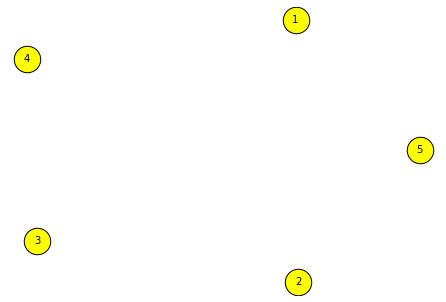

In [5]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

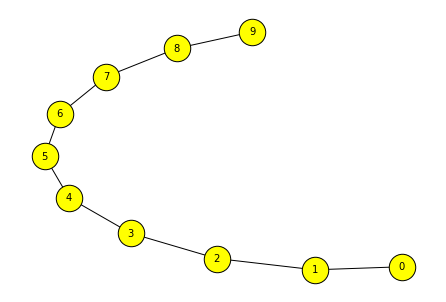

In [7]:
graph_other = nx.path_graph(10)
nx.draw(graph_other,  **draw_options)

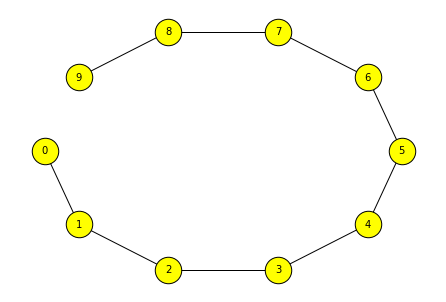

In [33]:
nx.draw_shell(graph_other, **draw_options)

[(1, 2), (1, 3), (2, 3)]


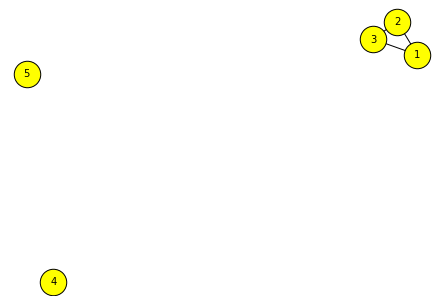

In [10]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
print(list(my_graph.edges))
nx.draw(my_graph,  **draw_options)

In [11]:
my_graph.clear()

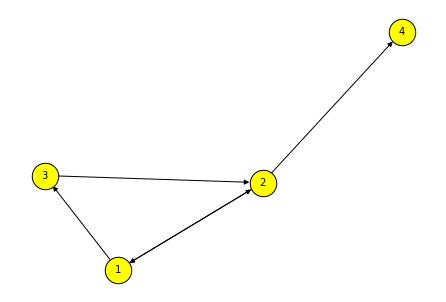

In [11]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3, 2)
nx.draw(G,  **draw_options)


In [12]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.neighbors(1))) 
print(G.out_degree[1])  # the number of edges exiting 1
print(G.in_degree[1])   # the number of edges entering 1
print(G.degree[1])      # the number of edges incident to 1

NameError: name 'G' is not defined

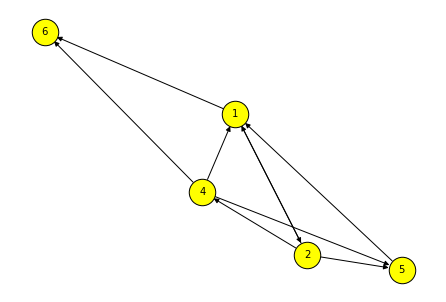

In [13]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_edge(6, 5)
nx.draw(G,  **draw_options)

In [15]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
pos = nx.spring_layout(FG)
print(pos)

{1: array([ 0.69914299, -0.78712562]), 2: array([0.0749286, 1.       ]), 3: array([-0.2201724 , -0.74207859]), 4: array([-0.55389918,  0.5292042 ])}


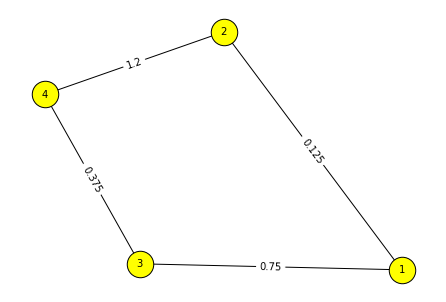

In [18]:

nx.draw(FG,pos, **draw_options)
nx.draw_networkx_edge_labels(FG, pos, edge_labels=nx.get_edge_attributes(FG,'weight'));


## Generate random graph

G graph:
node1 = 3, node2 = 8 , weight = 0.926
node1 = 8, node2 = 7 , weight = 0.301
node1 = 7, node2 = 6 , weight = 0.0437
node1 = 7, node2 = 9 , weight = 0.918
node1 = 6, node2 = 5 , weight = 0.0203
node1 = 9, node2 = 1 , weight = 0.335
node1 = 5, node2 = 1 , weight = 0.238


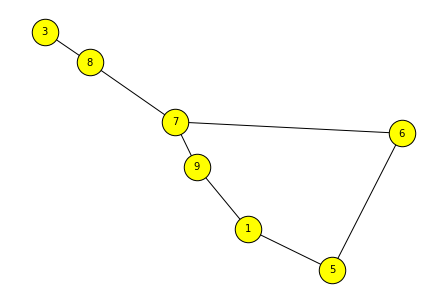

In [21]:
import numpy as np

def generate_random_graph(num_of_edges = 8, num_of_vertices = 10):
    G = nx.Graph()
    random_vertex = lambda: np.random.randint(0,num_of_vertices)
    for i in range(num_of_edges):
        u = random_vertex()
        while True:
            v = random_vertex()
            if v != u: break
        G.add_edge(u,v, weight=np.random.random())
    return G

def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

G = generate_random_graph()
print("G graph:")
print_graph(G)
nx.draw(G,  **draw_options)



H graph:
node1 = 2, node2 = 4 , weight = 0.386
node1 = 2, node2 = 5 , weight = 0.168
node1 = 4, node2 = 1 , weight = 0.466
node1 = 1, node2 = 7 , weight = 0.131
node1 = 5, node2 = 7 , weight = 0.635
node1 = 5, node2 = 3 , weight = 0.285
node1 = 3, node2 = 0 , weight = 0.369


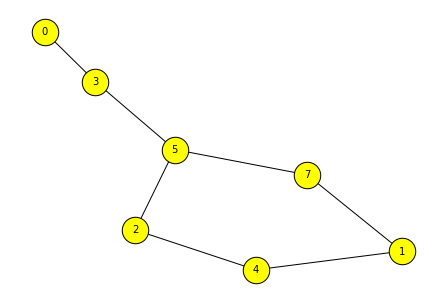

In [19]:
H = generate_random_graph()
print("\nH graph:")
print_graph(H)
nx.draw(H,  **draw_options)

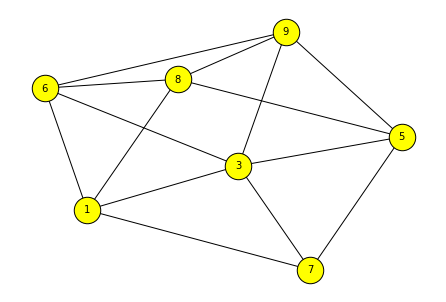

In [22]:
GC = nx.complement(G)  # every non-edge becomes an edge and vice-versa
nx.draw(GC,  **draw_options)

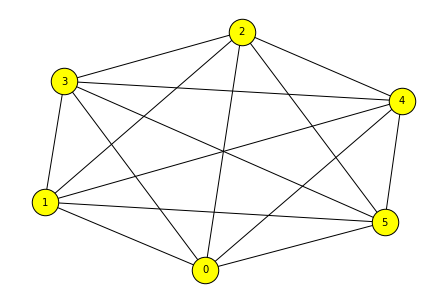

In [25]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw(K_6,  **draw_options)

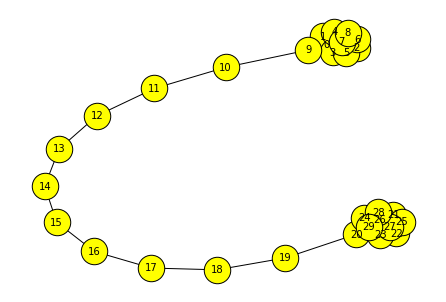

In [26]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

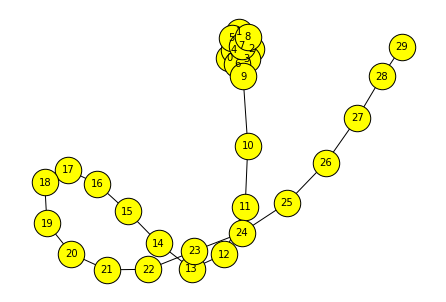

In [27]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

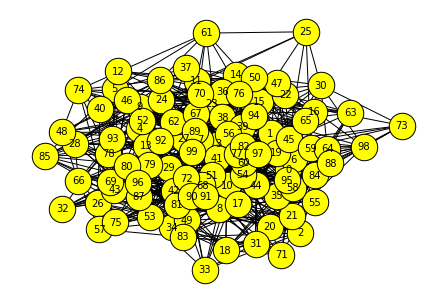

In [27]:
er = nx.erdos_renyi_graph(100, 0.15)        # Returns a G[n,p] random graph, also known as an Erdős-Rényi graph or a binomial graph.
nx.draw(er,  **draw_options)

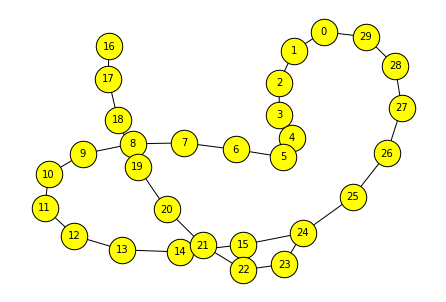

In [29]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
nx.draw(ws,  **draw_options)

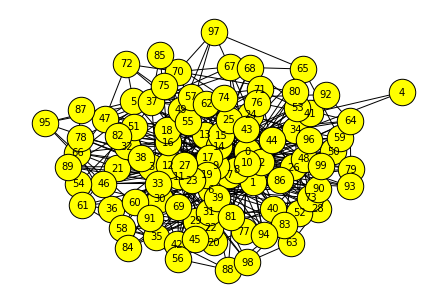

In [45]:
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
nx.draw(ba,  **draw_options)

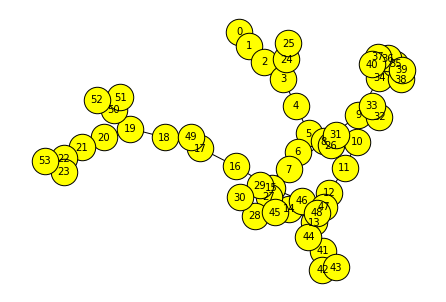

In [28]:
red = nx.random_lobster(20, 0.5, 0.5)      # Returns a random lobster graph.
nx.draw(red,  **draw_options)

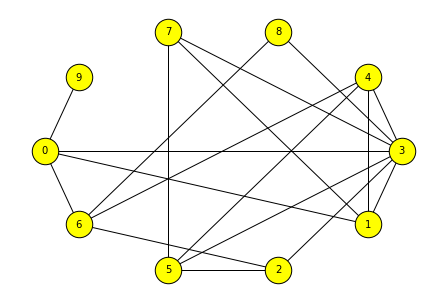

In [35]:
size = 10
G = generate_random_graph(num_of_edges = size*2, num_of_vertices=size) 
nx.draw_shell(G, **draw_options)

## Graph algorithms

In [36]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
source = 0
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean


~~~shortest path~~~
{0: {0: [0], 6: [0, 6], 3: [0, 3], 1: [0, 1], 9: [0, 9], 4: [0, 6, 4], 2: [0, 6, 2], 8: [0, 6, 8], 5: [0, 3, 5], 7: [0, 3, 7]}, 6: {6: [6], 0: [6, 0], 4: [6, 4], 2: [6, 2], 8: [6, 8], 3: [6, 0, 3], 1: [6, 0, 1], 9: [6, 0, 9], 5: [6, 4, 5], 7: [6, 0, 3, 7]}, 5: {5: [5], 2: [5, 2], 3: [5, 3], 4: [5, 4], 7: [5, 7], 6: [5, 2, 6], 1: [5, 3, 1], 0: [5, 3, 0], 8: [5, 3, 8], 9: [5, 3, 0, 9]}, 2: {2: [2], 5: [2, 5], 6: [2, 6], 3: [2, 3], 4: [2, 5, 4], 7: [2, 5, 7], 0: [2, 6, 0], 8: [2, 6, 8], 1: [2, 3, 1], 9: [2, 6, 0, 9]}, 1: {1: [1], 3: [1, 3], 7: [1, 7], 0: [1, 0], 4: [1, 4], 8: [1, 3, 8], 5: [1, 3, 5], 2: [1, 3, 2], 6: [1, 0, 6], 9: [1, 0, 9]}, 3: {3: [3], 1: [3, 1], 0: [3, 0], 8: [3, 8], 5: [3, 5], 4: [3, 4], 2: [3, 2], 7: [3, 7], 6: [3, 0, 6], 9: [3, 0, 9]}, 4: {4: [4], 6: [4, 6], 3: [4, 3], 1: [4, 1], 5: [4, 5], 0: [4, 6, 0], 2: [4, 6, 2], 8: [4, 6, 8], 7: [4, 3, 7], 9: [4, 6, 0, 9]}, 8: {8: [8], 3: [8, 3], 6: [8, 6], 1: [8, 3, 1], 0: [8, 3, 0], 5: [8, 3, 5], 4: [8, 3

In [51]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpy array



~~~weighted graph~~~
({0: [], 3: [0], 9: [0], 1: [0], 6: [0], 4: [6], 5: [6], 8: [6], 7: [9], 2: [3]}, {0: 0, 6: 0.768, 9: 0.859, 3: 0.945, 1: 0.992, 8: 1.47, 5: 1.509, 4: 1.6, 7: 1.6219999999999999, 2: 1.6509999999999998})
[0, 9]
[[0.    0.945 1.65  0.852 0.706 0.81  1.626 0.826 0.921 1.551]
 [0.945 0.    0.859 0.992 1.651 1.509 1.622 1.6   1.47  0.768]
 [1.65  0.859 0.    0.798 1.729 1.579 0.763 2.459 2.329 1.627]
 [0.852 0.992 0.798 0.    0.966 0.81  0.916 1.678 1.773 1.551]
 [0.706 1.651 1.729 0.966 0.    0.768 0.966 0.937 1.627 1.509]
 [0.81  1.509 1.579 0.81  0.768 0.    0.816 1.573 1.443 0.741]
 [1.626 1.622 0.763 0.916 0.966 0.816 0.    1.903 2.259 1.557]
 [0.826 1.6   2.459 1.678 0.937 1.573 1.903 0.    1.534 0.832]
 [0.921 1.47  2.329 1.773 1.627 1.443 2.259 1.534 0.    0.702]
 [1.551 0.768 1.627 1.551 1.509 0.741 1.557 0.832 0.702 0.   ]]


[(1, 0), (0, 2), (2, 1)]


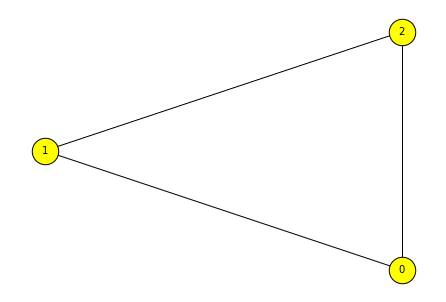

In [37]:
cycle = nx.find_cycle(G)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

{(0, 9), (2, 3), (1, 7), (4, 5), (8, 6)}


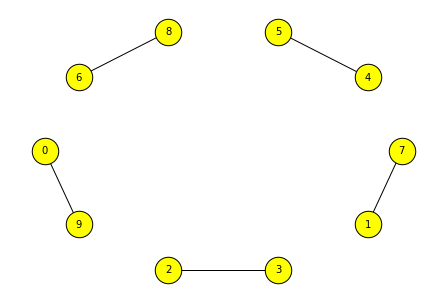

In [37]:
max_weight_matching = nx.max_weight_matching(G)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Bipartite graphs

There is no "bipartite graph" class in networkx; there are functions that treat a standard networkx.Graph as a bipartite graph.

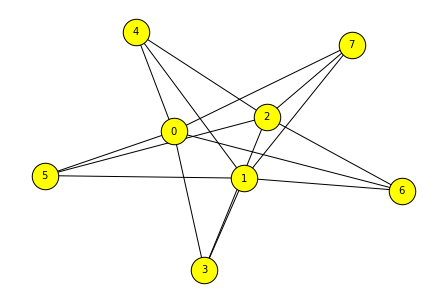

In [41]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
nx.draw(K_3_5,  **draw_options)

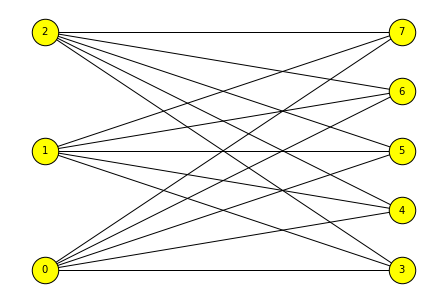

In [43]:
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

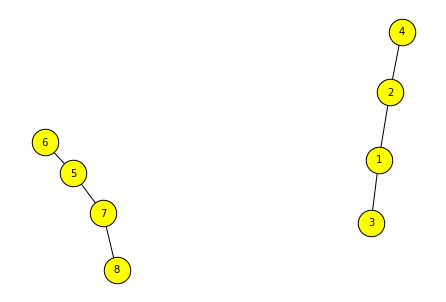

In [46]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
nx.draw(G,  **draw_options)

In [47]:

left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))  

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

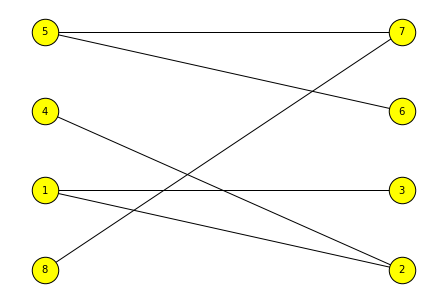

In [48]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

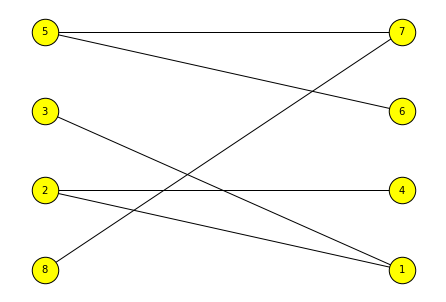

In [43]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

{0: 3, 1: 4, 2: 5, 3: 0, 4: 1, 5: 2}


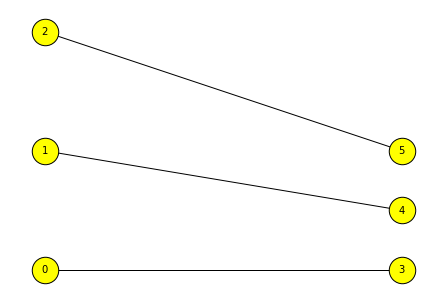

In [49]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [50]:
max_matching = nx.bipartite.maximum_matching(G) # Error: AmbiguousSolution

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

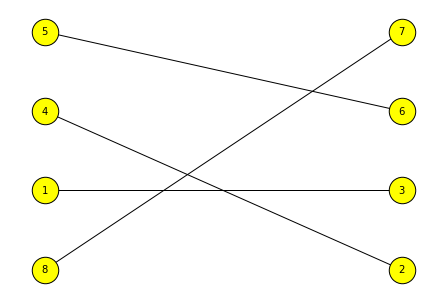

In [51]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

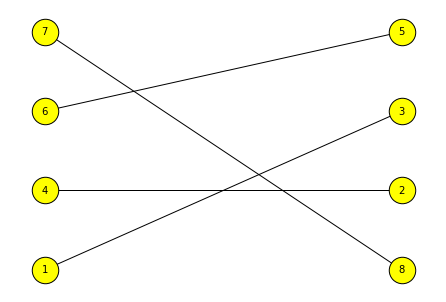

In [47]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))